In [20]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()
train_images.shape
#train_labels.shape
#test_images.shape
#test_labels.shape


(60000, 28, 28)

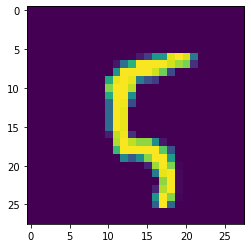

5


In [21]:
import matplotlib.pyplot as plt
plt.imshow (train_images[100])
plt.show()
print(train_labels[100])

In [33]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu', input_shape =(28*28,)))
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255
test_images.shape


(10000, 784)

In [35]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape

(60000, 10, 2)

In [ ]:
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2582 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1035 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0497 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0370 - accuracy: 0.9886


In [36]:
model.save('BT.h5')

In [37]:
from keras.models import load_model
model = load_model('BT.h5')

ValueError: ignored

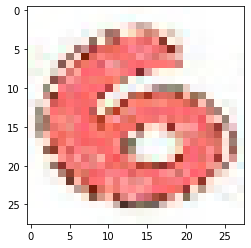

In [39]:
import numpy as np
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt

url = 'So.jpg'
img = load_img(url, target_size = (28,28,))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(-1,28,28,)
img = img.astype('float32')
img = img/255
classname = ['0','1','2','3','4','5','6','7','8','9']
a = np.argmax(model.predict(img))
print(model.predict(img))
a = int(a)
print("Day la",classname[a])
